In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel('Date-Wise-Prices-all-Commodity.xlsx')
df.head()

,diffgr:id,msdata:rowOrder,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,Table1,0,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 1,FAQ,24/02/2023,4000,4100.0,4000.0
1,Table2,1,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 2,FAQ,24/02/2023,3000,3500.0,3500.0
2,Table3,2,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 3,FAQ,24/02/2023,2300,2300.0,2300.0
3,Table4,3,Andhra Pradesh,Chittor,Punganur,Tomato,Hybrid,FAQ,24/02/2023,1340,2000.0,1670.0
4,Table5,4,Andhra Pradesh,Chittor,Vayalapadu,Tomato,Local,FAQ,24/02/2023,640,2160.0,1400.0


In [3]:
df.isnull().sum()

diffgr:id            0
msdata:rowOrder      0
State                0
District             0
Market               0
Commodity            0
Variety              0
Grade                0
Arrival_Date         0
Min_x0020_Price      0
Max_x0020_Price      0
Modal_x0020_Price    0
dtype: int64

In [4]:
df['Market'].unique()

array(['Chittoor', 'Punganur', 'Vayalapadu', 'Alur', 'Atmakur',
       'Banaganapalli', 'Nandikotkur', 'Gopalavaram', 'Bihiya', 'Kaimur',
       'Bahadurganj', 'Munghair', 'Nawada',
       'Parsoniya Mandi, Mahua block', 'Chandigarh(Grain/Fruit)',
       'Bhatgaon', 'Kasdol', 'Sarsiwan', 'Kusmee', 'Bilaspur',
       'Pendraroad', 'Sakri', 'Takhatpur', 'Tiphra', 'Gidam',
       'Belarbahara', 'Belargaon', 'Boraee', 'Gattasilli', 'Nagari',
       'Durg', 'Champa', 'Pathalgaon', 'Kawardha', 'Pipriya',
       'Bhanupratappur', 'Charama', 'Korar', 'Lakhanpuri', 'Narharpur',
       'Sambalpur', 'Manendragarh', 'Abhanpur', 'Arang', 'Rajnandgaon',
       'Pratappur', 'Surajpur', 'Sanquelim', 'Babra', 'Bagasara',
       'Damnagar', 'Vav', 'Ankleshwar', 'Jambusar', 'Jambusar(Kaavi)',
       'Botad(Haddad)', 'Dahod', 'Dahod(Veg. Market)', 'Dehgam',
       'Dehgam(Rekhiyal)', 'Mansa(Manas Veg Yard)', 'Bhanvad', 'Dhrol',
       'Kodinar', 'Kodinar(Dollasa)', 'Mangrol', 'Visavadar', 'Rapar',
       

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diffgr:id          6435 non-null   object 
 1   msdata:rowOrder    6435 non-null   int64  
 2   State              6435 non-null   object 
 3   District           6435 non-null   object 
 4   Market             6435 non-null   object 
 5   Commodity          6435 non-null   object 
 6   Variety            6435 non-null   object 
 7   Grade              6435 non-null   object 
 8   Arrival_Date       6435 non-null   object 
 9   Min_x0020_Price    6435 non-null   int64  
 10  Max_x0020_Price    6435 non-null   float64
 11  Modal_x0020_Price  6435 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 603.4+ KB


In [6]:
df.iloc[:,[4,5,6,7,8,9,10]]

,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price
0,Chittoor,Gur(Jaggery),NO 1,FAQ,24/02/2023,4000,4100.0
1,Chittoor,Gur(Jaggery),NO 2,FAQ,24/02/2023,3000,3500.0
2,Chittoor,Gur(Jaggery),NO 3,FAQ,24/02/2023,2300,2300.0
3,Punganur,Tomato,Hybrid,FAQ,24/02/2023,1340,2000.0
4,Vayalapadu,Tomato,Local,FAQ,24/02/2023,640,2160.0
...,...,...,...,...,...,...,...
6430,Diamond Harbour(South 24-pgs),Onion,Red,FAQ,24/02/2023,1400,1500.0
6431,Diamond Harbour(South 24-pgs),Potato,Jyoti,FAQ,24/02/2023,760,800.0
6432,Diamond Harbour(South 24-pgs),Rice,Common,FAQ,24/02/2023,2700,2900.0
6433,Diamond Harbour(South 24-pgs),Rice,Super Fine,FAQ,24/02/2023,4700,4900.0


only need above columns

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [8]:
df['Market']=le.fit_transform(df['Market'])
df['Commodity']=le.fit_transform(df['Commodity'])
df['Variety']=le.fit_transform(df['Variety'])
df['Grade']=le.fit_transform(df['Grade'])


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diffgr:id          6435 non-null   object 
 1   msdata:rowOrder    6435 non-null   int64  
 2   State              6435 non-null   object 
 3   District           6435 non-null   object 
 4   Market             6435 non-null   int32  
 5   Commodity          6435 non-null   int32  
 6   Variety            6435 non-null   int32  
 7   Grade              6435 non-null   int32  
 8   Arrival_Date       6435 non-null   object 
 9   Min_x0020_Price    6435 non-null   int64  
 10  Max_x0020_Price    6435 non-null   float64
 11  Modal_x0020_Price  6435 non-null   float64
dtypes: float64(2), int32(4), int64(2), object(4)
memory usage: 502.9+ KB


In [10]:

df.head()

,diffgr:id,msdata:rowOrder,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,Table1,0,Andhra Pradesh,Chittor,124,85,222,0,24/02/2023,4000,4100.0,4000.0
1,Table2,1,Andhra Pradesh,Chittor,124,85,223,0,24/02/2023,3000,3500.0,3500.0
2,Table3,2,Andhra Pradesh,Chittor,124,85,224,0,24/02/2023,2300,2300.0,2300.0
3,Table4,3,Andhra Pradesh,Chittor,453,166,155,0,24/02/2023,1340,2000.0,1670.0
4,Table5,4,Andhra Pradesh,Chittor,570,166,192,0,24/02/2023,640,2160.0,1400.0


In [11]:
df.drop('diffgr:id',axis=1,inplace=True)

In [12]:
df.drop('Arrival_Date',axis=1,inplace=True)

In [13]:
df.iloc[:,[3,4,5,6,7,8]]

,Market,Commodity,Variety,Grade,Min_x0020_Price,Max_x0020_Price
0,124,85,222,0,4000,4100.0
1,124,85,223,0,3000,3500.0
2,124,85,224,0,2300,2300.0
3,453,166,155,0,1340,2000.0
4,570,166,192,0,640,2160.0
...,...,...,...,...,...,...
6430,155,118,269,0,1400,1500.0
6431,155,133,169,0,760,800.0
6432,155,139,87,0,2700,2900.0
6433,155,139,304,0,4700,4900.0


In [14]:
## independent vs dependent
X=df.iloc[:,[3,4,5,6,7,8]].values
y=df.iloc[:,-1].values

In [15]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [17]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [18]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [19]:
regression.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred=regression.predict(X_test)

In [21]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [22]:
np.mean(validation_score)

-70010.88341908222

performance metrics

In [23]:
## performance matrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

74916.34940057689
85.71847889455488
273.7085117430163


R squared

In [24]:
## r squared
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.9998833191805016


model accuracy is 99%

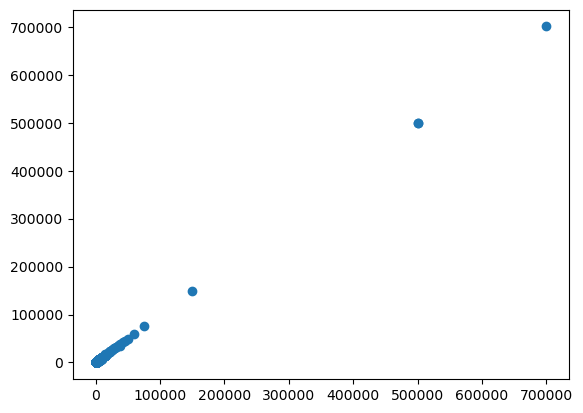

In [25]:
## assumption
plt.scatter(y_test,y_pred)

In [26]:
residuals=y_test-y_pred
print(residuals)

[ 55.55422021  20.20057082 219.59394295 ... -35.94790165 -41.26233383
 -38.61277003]


## normality

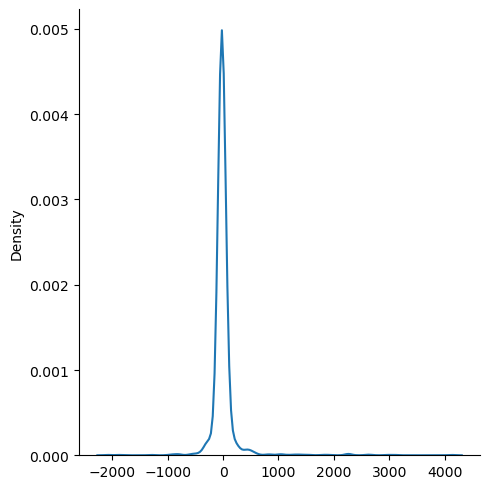

In [27]:
sns.displot(residuals,kind='kde')

data points is nomalty distribuated

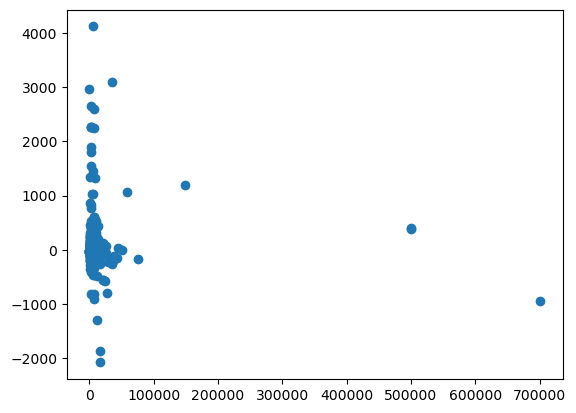

In [28]:
plt.scatter(y_pred,residuals)

## linearity

<Axes: xlabel='Min_x0020_Price', ylabel='Modal_x0020_Price'>

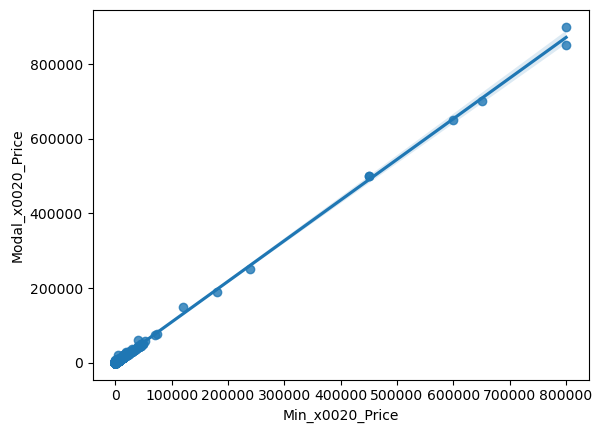

In [29]:
sns.regplot(x=df['Min_x0020_Price'],y=df['Modal_x0020_Price'])

<Axes: xlabel='Max_x0020_Price', ylabel='Modal_x0020_Price'>

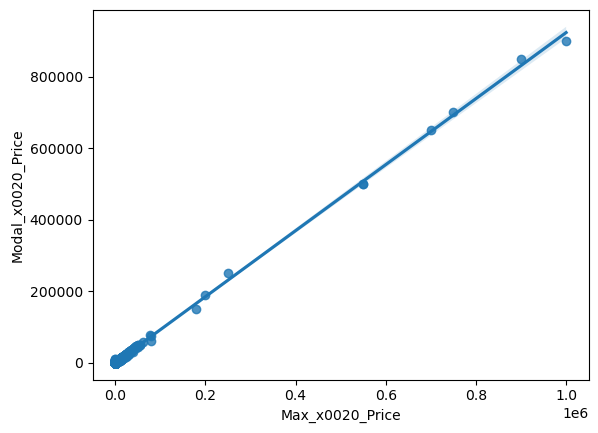

In [30]:
sns.regplot(x=df['Max_x0020_Price'],y=df['Modal_x0020_Price'])

In [31]:
## linear regression using ols
import statsmodels.api  as sm

In [32]:
model=sm.OLS(y_train,X_train).fit()

In [33]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                          1.932e+04
Date:                Mon, 26 Aug 2024   Prob (F-statistic):                        0.00
Time:                        11:03:30   Log-Likelihood:                         -47201.
No. Observations:                4826   AIC:                                  9.441e+04
Df Residuals:                    4820   BIC:                                  9.445e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

we can see that the coef from ols and regression model is same, model prediction and creations is correct

In [34]:
regression.coef_

array([ 4.33670362e-01, -1.08200312e+01,  1.39719831e+01, -1.10888400e+01,
        1.04389161e+04,  1.05609276e+04])

In [35]:
df.iloc[:,[3,4,5,6,7,8]]

,Market,Commodity,Variety,Grade,Min_x0020_Price,Max_x0020_Price
0,124,85,222,0,4000,4100.0
1,124,85,223,0,3000,3500.0
2,124,85,224,0,2300,2300.0
3,453,166,155,0,1340,2000.0
4,570,166,192,0,640,2160.0
...,...,...,...,...,...,...
6430,155,118,269,0,1400,1500.0
6431,155,133,169,0,760,800.0
6432,155,139,87,0,2700,2900.0
6433,155,139,304,0,4700,4900.0


In [36]:
df.head()

,msdata:rowOrder,State,District,Market,Commodity,Variety,Grade,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,0,Andhra Pradesh,Chittor,124,85,222,0,4000,4100.0,4000.0
1,1,Andhra Pradesh,Chittor,124,85,223,0,3000,3500.0,3500.0
2,2,Andhra Pradesh,Chittor,124,85,224,0,2300,2300.0,2300.0
3,3,Andhra Pradesh,Chittor,453,166,155,0,1340,2000.0,1670.0
4,4,Andhra Pradesh,Chittor,570,166,192,0,640,2160.0,1400.0


In [37]:
regression.predict(scaler.transform([[570,166,192,0,640,2160]]))

array([1357.00175002])

so the predicted price of tomato(166), local variety of FAQ grade with min_price=640 and max_price=2160 is 1357.00